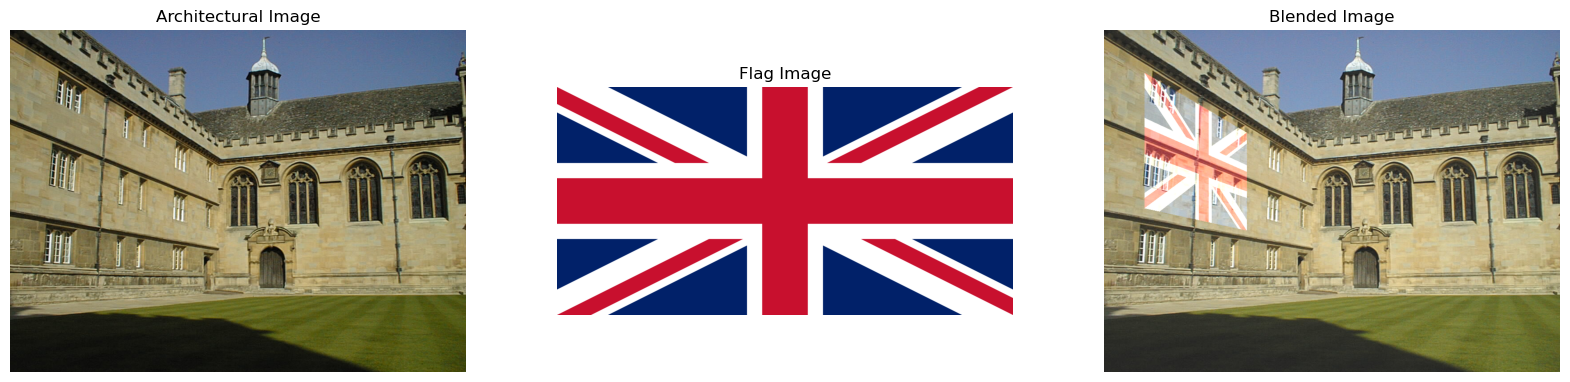

In [54]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the architectural image and the flag image
image_1 = cv.imread('images/005.jpg')  # The main image
image_2 = cv.imread('images/flag.png')  # The image to superimpose (e.g., a flag)

# Normalize the images for blending
image_1 = image_1.astype(np.float64) / 255.0
image_2 = image_2.astype(np.float64) / 255.0

# Array to store the coordinates of the clicked points
coordinates = [(320, 230), (90, 95),(90, 400), (320, 450)] # 2,1,3,4

# Define the coordinates of the flag image corners (fixed)
X = np.array([[0, 0, 1], 
              [image_2.shape[1], 0, 1], 
              [image_2.shape[1], image_2.shape[0], 1], 
              [0, image_2.shape[0], 1]]).T

# Convert the clicked coordinates into homogeneous format
Y = np.array([[coordinates[0][0], coordinates[0][1], 1],
              [coordinates[1][0], coordinates[1][1], 1],
              [coordinates[2][0], coordinates[2][1], 1],
              [coordinates[3][0], coordinates[3][1], 1]]).T

# Build matrix A to solve for homography H
O = np.array([[0], [0], [0]])
A = []

for i in range(4):
    A.append(np.concatenate((O.T, np.expand_dims(X.T[i,:], axis=0), 
                             np.expand_dims(-1 * Y[1, i] * X.T[i,:], axis=0)), axis=1))
    A.append(np.concatenate((np.expand_dims(X.T[i,:], axis=0), O.T, 
                             np.expand_dims(-1 * Y[0, i] * X.T[i,:], axis=0)), axis=1))

A = np.array(A).squeeze().astype(np.float64)

# Solve for the homography matrix H using SVD
eigen_values, eigen_vectors = np.linalg.eig(A.T @ A)
H = eigen_vectors[:, np.argmin(eigen_values)]
H = H.reshape(3, -1)

# Apply the homography to warp the flag image to fit the selected points
t_image_2 = cv.warpPerspective(image_2, H, (image_1.shape[1], image_1.shape[0]))

# Blend the two images together
beta = 0.5  # Blending factor
blended_img = cv.addWeighted(image_1, 1, t_image_2, beta, 0.1)
blended_img[blended_img > 1] = 1  # Ensure pixel values are in the valid range

# Convert images to RGB for plotting with matplotlib
first_image_rgb = cv.cvtColor((image_1 * 255).astype(np.uint8), cv.COLOR_BGR2RGB)
image_2_rgb = cv.cvtColor((image_2 * 255).astype(np.uint8), cv.COLOR_BGR2RGB)
blended_img_rgb = cv.cvtColor((blended_img * 255).astype(np.uint8), cv.COLOR_BGR2RGB)

# Plot the results: Original image, Flag image, and the Blended result
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(first_image_rgb)
ax[1].imshow(image_2_rgb)
ax[2].imshow(blended_img_rgb)

# Set titles
ax[0].set_title("Architectural Image")
ax[1].set_title("Flag Image")
ax[2].set_title("Blended Image")

# Remove axis for a cleaner look
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")

# Show the plot
plt.show()



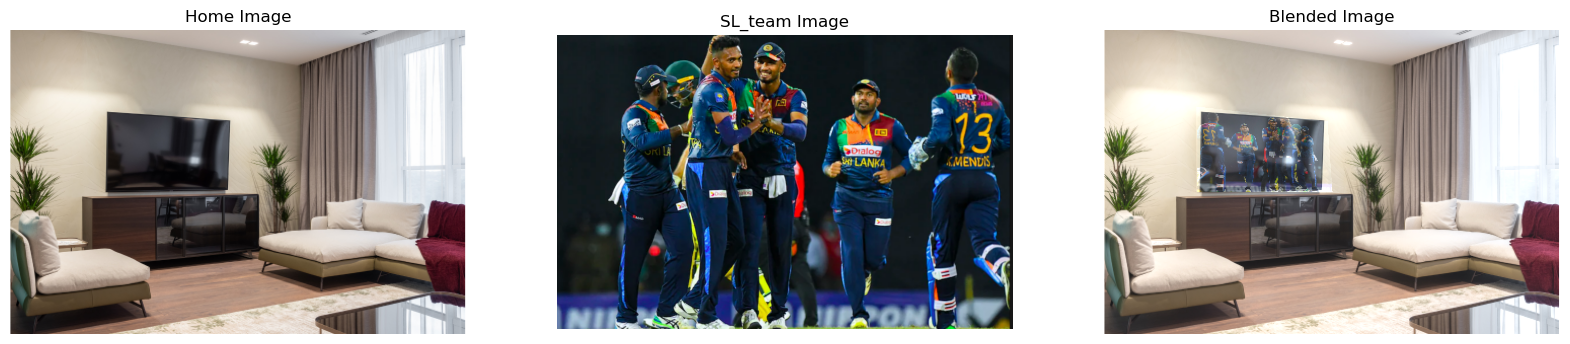

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the home image and the SL_team image
image_1 = cv.imread('images/home.png')  # The main image
image_2 = cv.imread('images/SL_team.png')  # The image to superimpose (e.g., a flag)

# Normalize the images for blending
image_1 = image_1.astype(np.float64) / 255.0
image_2 = image_2.astype(np.float64) / 255.0

# Array to store the coordinates of the clicked points
coordinates = [(220, 90), (90, 75),(90, 160), (225, 160)]

# Define the coordinates of the flag image corners (fixed)
X = np.array([[0, 0, 1], 
              [image_2.shape[1], 0, 1], 
              [image_2.shape[1], image_2.shape[0], 1], 
              [0, image_2.shape[0], 1]]).T

# Convert the clicked coordinates into homogeneous format
Y = np.array([[coordinates[0][0], coordinates[0][1], 1],
              [coordinates[1][0], coordinates[1][1], 1],
              [coordinates[2][0], coordinates[2][1], 1],
              [coordinates[3][0], coordinates[3][1], 1]]).T

# Build matrix A to solve for homography H
O = np.array([[0], [0], [0]])
A = []

for i in range(4):
    A.append(np.concatenate((O.T, np.expand_dims(X.T[i,:], axis=0), 
                             np.expand_dims(-1 * Y[1, i] * X.T[i,:], axis=0)), axis=1))
    A.append(np.concatenate((np.expand_dims(X.T[i,:], axis=0), O.T, 
                             np.expand_dims(-1 * Y[0, i] * X.T[i,:], axis=0)), axis=1))

A = np.array(A).squeeze().astype(np.float64)

# Solve for the homography matrix H using SVD
eigen_values, eigen_vectors = np.linalg.eig(A.T @ A)
H = eigen_vectors[:, np.argmin(eigen_values)]
H = H.reshape(3, -1)

# Apply the homography to warp the flag image to fit the selected points
t_image_2 = cv.warpPerspective(image_2, H, (image_1.shape[1], image_1.shape[0]))

# Blend the two images together
beta = 0.5  # Blending factor
blended_img = cv.addWeighted(image_1, 1, t_image_2, beta, 0.1)
blended_img[blended_img > 1] = 1  # Ensure pixel values are in the valid range

# Convert images to RGB for plotting with matplotlib
first_image_rgb = cv.cvtColor((image_1 * 255).astype(np.uint8), cv.COLOR_BGR2RGB)
image_2_rgb = cv.cvtColor((image_2 * 255).astype(np.uint8), cv.COLOR_BGR2RGB)
blended_img_rgb = cv.cvtColor((blended_img * 255).astype(np.uint8), cv.COLOR_BGR2RGB)

# Plot the results: Original image, Flag image, and the Blended result
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(first_image_rgb)
ax[1].imshow(image_2_rgb)
ax[2].imshow(blended_img_rgb)

# Set titles
ax[0].set_title("Home Image")
ax[1].set_title("SL_team Image")
ax[2].set_title("Blended Image")

# Remove axis for a cleaner look
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")

# Show the plot
plt.show()